## KNN Classifier Implemented by Joscandy Nunez

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# read in data
data = pd.read_csv('dataset_phishing.csv')
# observe a few samples of the data
subset = data[['https_token', 'ratio_digits_url', 'nb_hyphens', 'nb_dots', 'nb_underscore', 'nb_slash', 'status']]
# subset.head()

,https_token,ratio_digits_url,nb_hyphens,nb_dots,nb_underscore,nb_slash,status
0,1,0.000000,0,3,0,3,legitimate
1,1,0.220779,0,1,0,5,phishing
2,0,0.150794,1,4,2,5,phishing
3,1,0.000000,0,2,0,2,legitimate
4,1,0.000000,2,2,0,5,legitimate


In [2]:
# observe entire data
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
data.info() # further analysis for data cleaning purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# encode data
# temporarily turn text like "phishing" and "legitimate" into numbers 1 and 0, respectively
le = preprocessing.LabelEncoder()
le.fit(["phishing", "legitimate"]) # status of url is the corresponding feature, our target class
transformedClass = le.transform(data.status[:].values) # get the new values
print("text values ", data.status[:].values, "become ", transformedClass)
data['status'] = transformedClass # swap the old values with the new encoded values

text values  ['legitimate' 'phishing' 'phishing' ... 'legitimate' 'legitimate'
 'phishing'] become  [0 1 1 ... 0 0 1]


In [5]:
# features we are using for training the model, which is a mixture of ints and floats
X = data[['https_token', 'ratio_digits_url', 'nb_hyphens', 'nb_dots', 'nb_underscore', 'nb_slash']]
# target class
y = data['status']

print("---------------FEATURES---------------------")
print(X)

print("---------------TARGET---------------------")
print(y)

---------------FEATURES---------------------
       https_token  ratio_digits_url  nb_hyphens  nb_dots  nb_underscore  \
0                1          0.000000           0        3              0   
1                1          0.220779           0        1              0   
2                0          0.150794           1        4              2   
3                1          0.000000           0        2              0   
4                1          0.000000           2        2              0   
...            ...               ...         ...      ...            ...   
11425            1          0.000000           0        2              0   
11426            1          0.023810           0        5              0   
11427            0          0.142857           6        2              1   
11428            1          0.000000           0        2              0   
11429            1          0.085954           0       24             18   

       nb_slash  
0             3  
1     

In [6]:
# split our data into train and test data groups, default is train size 75%, test size 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

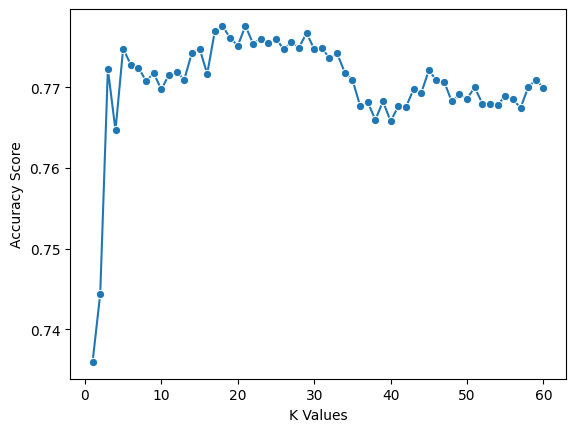

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# code to find our best k to optimize our classifier's number of neighbors k
k_values = [i for i in range (1,61)]
scores = []

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
import seaborn as sns

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
best_index = np.argmax(scores)
best_k = k_values[best_index]
    
# visualize the k findings 
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# create instance of KNN classifier
#### ran algorithm above to find best k ###
knn = KNeighborsClassifier(n_neighbors = best_k)

In [8]:
# train our model using X and y train values
knn.fit(X_train.values, y_train)

KNeighborsClassifier(n_neighbors=18)

In [9]:
# test how "good" the model does at seeing unseen test data
# get accuracy, precision and recall score to measure the performance of classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = knn.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred) # same as knn.score()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7925122463261022
Precision: 0.8117998506348021
Recall: 0.761204481792717


In [18]:
## set of URLs to use for testing prediction
# url_to_predict = 'https://www.coursera.org/learn/python-machine-learning/lecture/MwsUM/k-nearest-neighbors-classification'
# url_to_predict = 'https://app.simplenote.com/publish/XhRdVc'
# url_to_predict = 'https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python'
url_to_predict = 'https://www.mjwaldman.com/'
# url_to_predict = 'https://www.simplilearn.com/tutorials/python-tutorial/python-if-else-statement'
# url_to_predict = 'https://tubitv.com/category/peliculas_en_espanol'

# function to get how many digits there are in the url string, returns that number as an int
def countDigits(string):
    alpha = 0
    for i in string:
        if (i.isalpha()):
            alpha+=1
    return alpha

# function to extract the features of the url used in the KNN classifier
# takes url string as input
# returns int for counts, and boolean for https_token being present or not
def extract_features(url_to_predict):
    hyphens = url_to_predict.count('-')  # grab how many hyphens
    dots = url_to_predict.count('.')  # grab how many dots
    slashes = url_to_predict.count('/')  # grab how many slashes
    underscore = url_to_predict.count('_')  # grab how many underscores
    ratio_of_digits = countDigits(url_to_predict)/len(url_to_predict)  # divide amount of digits by length of url
    # determine whether https is present or not, true or false 
    https_token = url_to_predict.__contains__('https') 
    if (https_token):
        https_token = 1
    else:
        https_token = 0
        
    # print statements for visualizing totals
    print("There are:")
    print("Hyphens: ", hyphens)
    print("Dots: ", dots)
    print("Slashes: ", slashes)
    print("Underscore: ", underscore)
    print("Ratio of digits: ", ratio_of_digits)
    print("https token: ", https_token)
    
    return https_token, ratio_of_digits, hyphens, dots, underscore, slashes
    
https_token, ratio_digits_url, nb_hyphens, nb_dots, nb_underscore, nb_slash = extract_features(url_to_predict)


# make prediction using extracted features returned from our function call
url_prediction = knn.predict([[https_token, ratio_digits_url, nb_hyphens, nb_dots, nb_underscore, nb_slash]])
# print what that prediction is, raw
print(url_prediction)

There are:
Hyphens:  0
Dots:  2
Slashes:  3
Underscore:  0
Ratio of digits:  0.7692307692307693
https token:  1
[1]


In [11]:
# de-encode this KNN classifier prediction value, resulting in the text-string that corresponds to that value
list(le.inverse_transform(url_prediction))

['legitimate']